# Task 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

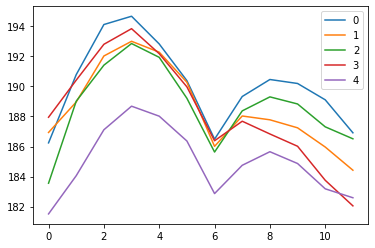

In [11]:
ozon = np.load(r'D:\Downloads\ozon.npy')
data = ozon.reshape(-1, 12)
for i in range(5):
    plt.plot(data[i], label = str(i))
plt.legend()

[71.9925     24.561295   15.208212    6.5993576   5.5962143   3.6778386
  3.3324983   3.064712    1.453024    1.3164082   0.9024373   0.81703395]
[ 0.0000000e+00  4.7683716e-07  9.5367432e-07  4.7683716e-07
 -1.4305115e-06  0.0000000e+00 -4.7683716e-07 -4.7683716e-07
  0.0000000e+00  9.5367432e-07  0.0000000e+00  9.5367432e-07]
[-21.985548    9.367641    1.0356168]
[-0.05597448  0.36371326  0.30176926 -0.05983257 -0.49517393 -0.17907286
  0.05544376  0.26041174 -0.32281876 -0.28562403  0.2697506   0.18410778]


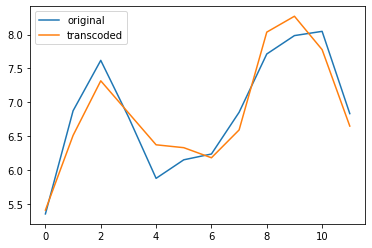

In [19]:
mean = data.mean (axis=0)
data-=mean
u, s, v = np.linalg.svd(data) #число строк,чего-то, матрица поворота
print(s)

x = data[0]
transcoded_x = v.T @ (v @ x)
print(x - transcoded_x)

encoder  = v[:3]
encoded_x = encoder @ x #проецируем в линейное подпространство размера 3
print(encoded_x)

transcoded_x = encoder.T @ encoded_x
print(x-transcoded_x)
plt.figure()
plt.plot(x, label = 'original')
plt.plot(transcoded_x, label='transcoded')
plt.legend()

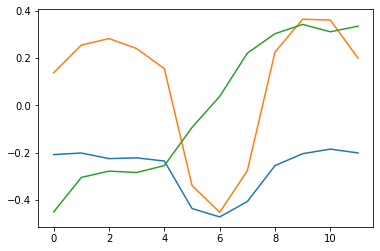

In [20]:
plt.figure()
for i in range(3):
    plt.plot(v[i], label = str(i))

# Task 2

In [21]:
#eigenface
from PIL import Image
import glob

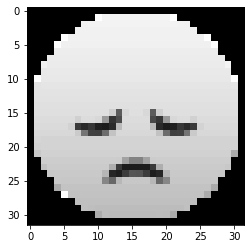

In [33]:
files = glob.glob('D:\Downloads\emoji\emoji\*.png')
images = [Image.open(f).convert('L') for f in files]
shape = images[0].size
samples = [np.array(image, dtype=float).reshape(-1) for image in images]
data = np.vstack(samples)
mean = data.mean(axis=0)
data -= mean

plt.imshow((data[12] + mean).reshape(shape), cmap='gray')

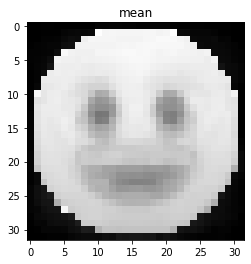

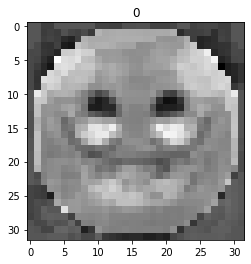

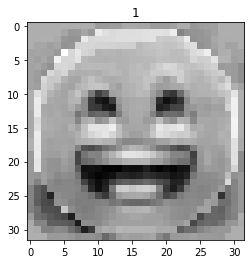

In [32]:
u, s, v = np.linalg.svd(data)

plt.figure()
plt.title('mean')
plt.imshow(mean.reshape(shape), cmap='gray')
for i in range(2):
    plt.figure()
    plt.title(str(i))
    plt.imshow(v[i].reshape(shape), cmap='gray')

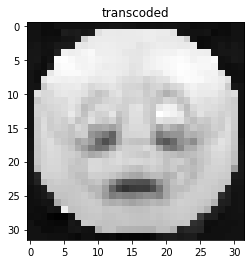

In [36]:
x = data[12]
encoder = v[:20]
transcoded = encoder.T @ (encoder @ x)
plt.figure()
plt.title('transcoded')
plt.imshow((transcoded + mean).reshape(shape), cmap='gray')